In [2]:
pip install keras

     ---------------------------------------- 1.6/1.6 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

     -------------------------------------- 444.0/444.0 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.4 MB/s eta 0:00:00
     -------------------

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
forest=pd.read_csv(r"C:\Users\Shivam\Downloads\forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [13]:
forest.T

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.0,91.0,81.6,81.6,81.6,81.6,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
RH,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31
wind,6.7,0.9,1.3,4.0,1.8,5.4,3.1,2.2,5.4,4.0,...,3.6,3.6,7.6,5.4,2.7,2.7,5.8,6.7,4.0,4.5
rain,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
forest.shape

(517, 31)

In [16]:
numerical_feature=forest.describe(include=['int','float']).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


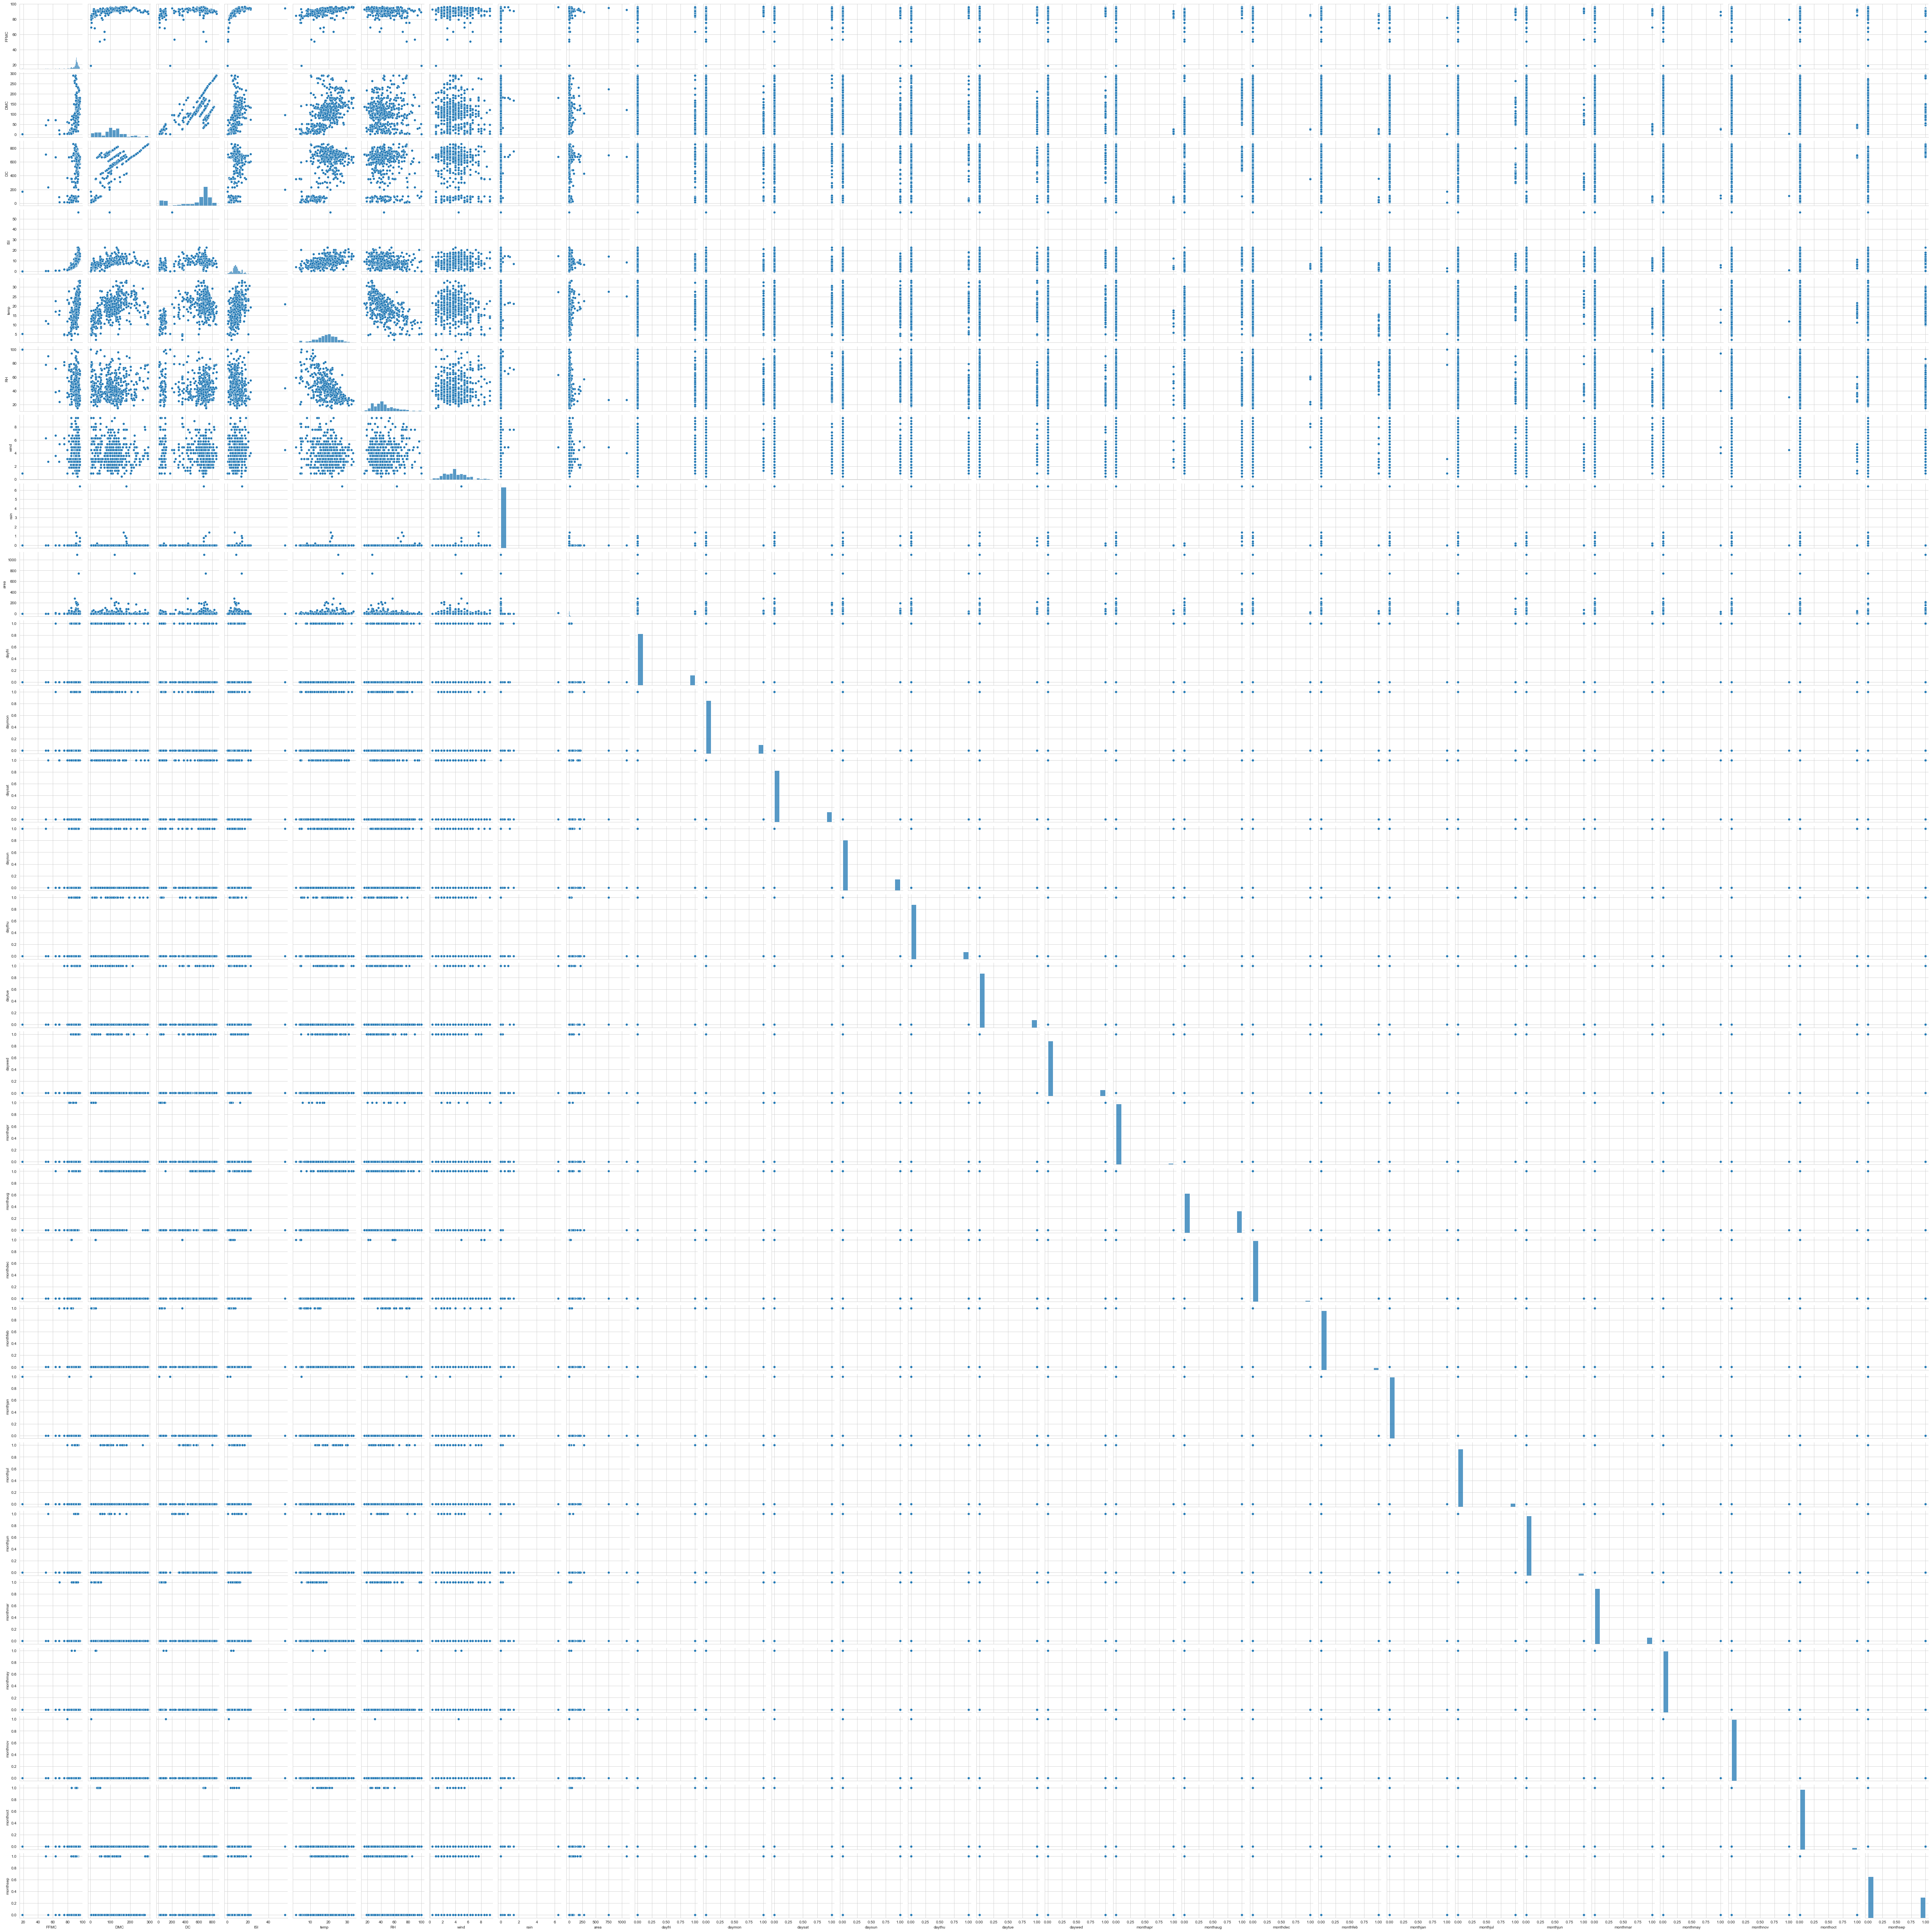

In [17]:
sns.set_style('whitegrid')
sns.pairplot(forest[numerical_feature])
plt.show()

In [18]:
categorical_feature=forest.describe(include=['object']).columns

print(list(categorical_feature))

['month', 'day', 'size_category']


Index(['month', 'day', 'size_category'], dtype='object')


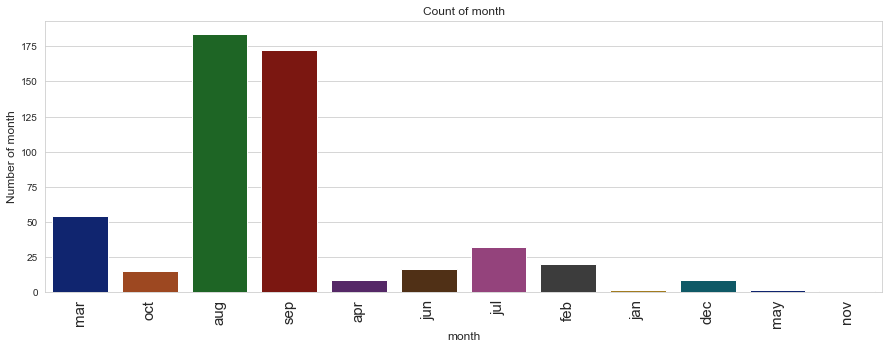

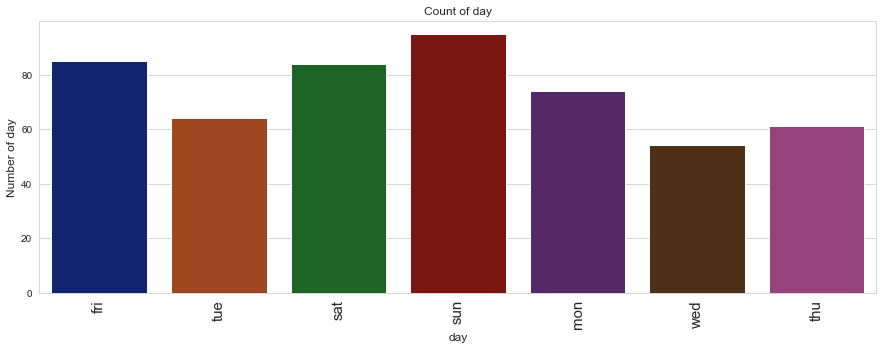

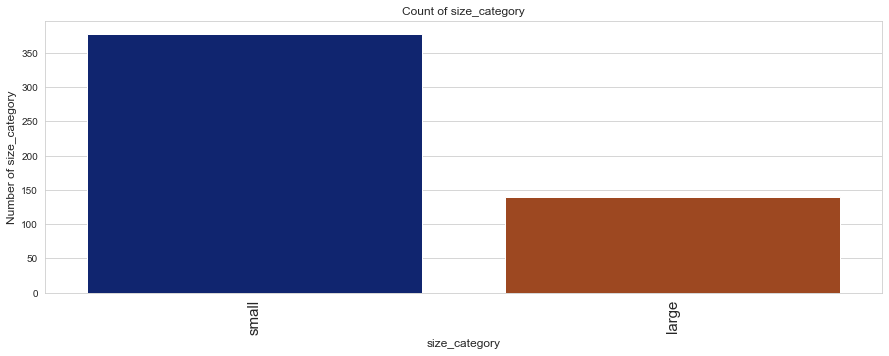

In [19]:
print(categorical_feature)



for idx, column in enumerate(categorical_feature):
    plt.figure(figsize=(15, 5))
    df = forest.copy()
    unique = df[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=forest, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 90, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

In [21]:
data=forest.drop(['month','day'],axis=1)
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [22]:
mapping={'small':1, 'large':2}
mapping

{'small': 1, 'large': 2}

In [24]:
data=data.replace(mapping)
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,2
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,2
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,2
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
x=np.array(data.iloc[:,0:28])
y=np.array(data.iloc[:,28])

# NORMALIZING DATA

In [30]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [31]:
x_norm=norm_func(x)
x_norm

array([[0.07902167, 0.02401819, 0.08644714, ..., 0.        , 0.        ,
        0.        ],
       [0.08305526, 0.03245206, 0.61338051, ..., 0.        , 0.00091672,
        0.        ],
       [0.08305526, 0.04006087, 0.62969821, ..., 0.        , 0.00091672,
        0.        ],
       ...,
       [0.07480474, 0.05197829, 0.61017198, ..., 0.        , 0.        ,
        0.        ],
       [0.08653881, 0.13384181, 0.56351069, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

# DATA SPLITING

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,stratify = y)

# APPLYING NEURAL NETWORK

In [35]:
model=Sequential()
model.add(Dense(8,input_dim=28,activation='linear'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)

Epoch 1/120
29/29 [==============================] - 0s 5ms/step - loss: -4.8156 - accuracy: 0.7336 - val_loss: -4.9736 - val_accuracy: 0.7258
Epoch 2/120
29/29 [==============================] - 0s 4ms/step - loss: -4.8497 - accuracy: 0.7336 - val_loss: -5.0087 - val_accuracy: 0.7258
Epoch 3/120
29/29 [==============================] - 0s 5ms/step - loss: -4.8836 - accuracy: 0.7336 - val_loss: -5.0451 - val_accuracy: 0.7258
Epoch 4/120
29/29 [==============================] - 0s 4ms/step - loss: -4.9188 - accuracy: 0.7336 - val_loss: -5.0787 - val_accuracy: 0.7258
Epoch 5/120
29/29 [==============================] - 0s 4ms/step - loss: -4.9525 - accuracy: 0.7336 - val_loss: -5.1142 - val_accuracy: 0.7258
Epoch 6/120
29/29 [==============================] - 0s 4ms/step - loss: -4.9860 - accuracy: 0.7336 - val_loss: -5.1520 - val_accuracy: 0.7258
Epoch 7/120
29/29 [==============================] - 0s 4ms/step - loss: -5.0215 - accuracy: 0.7336 - val_loss: -5.1863 - val_accuracy: 0.7258

Epoch 58/120
29/29 [==============================] - 0s 5ms/step - loss: -6.7753 - accuracy: 0.7336 - val_loss: -6.9902 - val_accuracy: 0.7258
Epoch 59/120
29/29 [==============================] - 0s 5ms/step - loss: -6.8090 - accuracy: 0.7336 - val_loss: -7.0268 - val_accuracy: 0.7258
Epoch 60/120
29/29 [==============================] - 0s 4ms/step - loss: -6.8446 - accuracy: 0.7336 - val_loss: -7.0603 - val_accuracy: 0.7258
Epoch 61/120
29/29 [==============================] - 0s 4ms/step - loss: -6.8774 - accuracy: 0.7336 - val_loss: -7.0982 - val_accuracy: 0.7258
Epoch 62/120
29/29 [==============================] - 0s 5ms/step - loss: -6.9133 - accuracy: 0.7336 - val_loss: -7.1318 - val_accuracy: 0.7258
Epoch 63/120
29/29 [==============================] - 0s 5ms/step - loss: -6.9466 - accuracy: 0.7336 - val_loss: -7.1687 - val_accuracy: 0.7258
Epoch 64/120
29/29 [==============================] - 0s 4ms/step - loss: -6.9819 - accuracy: 0.7336 - val_loss: -7.2025 - val_accuracy:

Epoch 115/120
29/29 [==============================] - 0s 5ms/step - loss: -8.7263 - accuracy: 0.7336 - val_loss: -9.0004 - val_accuracy: 0.7258
Epoch 116/120
29/29 [==============================] - 0s 4ms/step - loss: -8.7606 - accuracy: 0.7336 - val_loss: -9.0346 - val_accuracy: 0.7258
Epoch 117/120
29/29 [==============================] - 0s 3ms/step - loss: -8.7941 - accuracy: 0.7336 - val_loss: -9.0706 - val_accuracy: 0.7258
Epoch 118/120
29/29 [==============================] - 0s 4ms/step - loss: -8.8294 - accuracy: 0.7336 - val_loss: -9.1041 - val_accuracy: 0.7258
Epoch 119/120
29/29 [==============================] - 0s 2ms/step - loss: -8.8634 - accuracy: 0.7336 - val_loss: -9.1383 - val_accuracy: 0.7258
Epoch 120/120
29/29 [==============================] - 0s 4ms/step - loss: -8.8962 - accuracy: 0.7336 - val_loss: -9.1766 - val_accuracy: 0.7258


# Accuracy for train data

In [40]:
scores=model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: -8.9949 - accuracy: 0.7312
accuracy: 73.12%


# Accuracy for Test data

In [42]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: -9.0105 - accuracy: 0.7308
accuracy: 73.08%
